# Convex hull as diagnostic tool in single-molecule localization microscopy
# Selection based on sample variance
Note that the variances are taken (therefore, the localization precision squared) due to the easier obtainable unbiased version (compared to the standard deviation) by using Bessel's correction.

This notebook includes the generation of lookup tables 5-8.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from brokenaxes import brokenaxes

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import src.simulations as si
import src.convex_hull as ch
import src.sample_variance as sv
import src.matplotlib_custom_sim_cal_ch as mc
from src.matplotlib_custom import second_axis, pie_plot

## 1. Simulation and calculation of mean and mean squared error of the variance as estimator
The mean squared error MSE depends on the variance and the bias of an estimator. If the estimator is unbiased, MSE only depends on the variance. If the square root of MSE is taken, one receives the root mean squared error RMSE. If the estimator is unbiased, this represents the standard error.

#### Unbiased

In [2]:
n = np.arange(3, 101, 1)
n_max_points = 100
sigma = np.sqrt(2)
n_simulations = 10000
seed = 100

In [3]:
bias = False
different_x_y = False

array_sim_variance = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed, bias,
                                                     different_x_y)
means_obs = np.mean(array_sim_variance, axis=1)
mse_obs = sv.observed_mse(array_sim_variance, sigma, bias)
mse_calc = sv.mse_calculation(n, sigma, bias, different_x_y)
expected_value = sv.expected_value_variance(n, sigma, bias, different_x_y)

Text(0, 0.5, 'MSE')

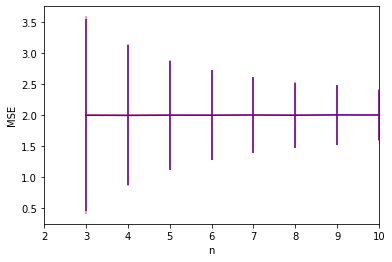

In [4]:
fig, ax = plt.subplots()
ax.errorbar(n, means_obs, yerr=mse_obs, color="b")
ax.errorbar(n, expected_value, yerr=mse_calc, alpha=0.5, color="r")
ax.set_xlim(2, 10)
ax.set_xlabel("n")
ax.set_ylabel("MSE")

In [5]:
bias = False
different_x_y = True

array_sim_variance = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed, bias,
                                                     different_x_y)
means_obs = np.mean(array_sim_variance, axis=1)
mse_obs = sv.observed_mse(array_sim_variance, sigma, bias)
mse_calc = sv.mse_calculation(n, sigma, bias, different_x_y)
expected_value = sv.expected_value_variance(n, sigma, bias, different_x_y)

Text(0, 0.5, 'MSE')

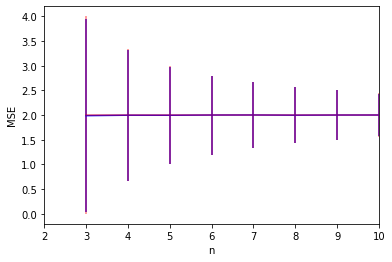

In [6]:
fig, ax = plt.subplots()
ax.errorbar(n, means_obs, yerr=mse_obs, color="b")
ax.errorbar(n, expected_value, yerr=mse_calc, alpha=0.5, color="r")
ax.set_xlim(2, 10)
ax.set_xlabel("n")
ax.set_ylabel("MSE")

#### Biased

In [7]:
bias = True
different_x_y = False

array_sim_variance = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed, bias,
                                                     different_x_y)
means_obs = np.mean(array_sim_variance, axis=1)
mse_obs = sv.observed_mse(array_sim_variance, sigma, bias)
mse_calc = sv.mse_calculation(n, sigma, bias, different_x_y)
expected_value = sv.expected_value_variance(n, sigma, bias, different_x_y)

Text(0, 0.5, 'MSE')

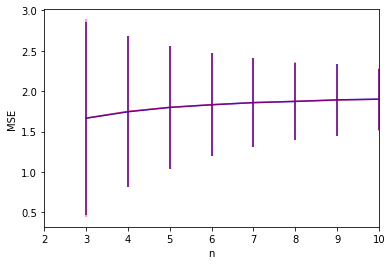

In [8]:
fig, ax = plt.subplots()
ax.errorbar(n, means_obs, yerr=mse_obs, color="b")
ax.errorbar(n, expected_value, yerr=mse_calc, alpha=0.5, color="r")
ax.set_xlim(2, 10)
ax.set_xlabel("n")
ax.set_ylabel("MSE")

In [9]:
bias = True
different_x_y = True

array_sim_variance = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed, bias,
                                                     different_x_y)
means_obs = np.mean(array_sim_variance, axis=1)
mse_obs = sv.observed_mse(array_sim_variance, sigma, bias)
mse_calc = sv.mse_calculation(n, sigma, bias, different_x_y)
expected_value = sv.expected_value_variance(n, sigma, bias, different_x_y)

Text(0, 0.5, 'MSE')

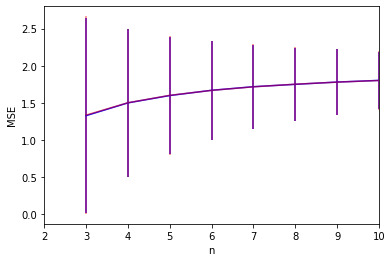

In [10]:
fig, ax = plt.subplots()
ax.errorbar(n, means_obs, yerr=mse_obs, color="b")
ax.errorbar(n, expected_value, yerr=mse_calc, alpha=0.5, color="r")
ax.set_xlim(2, 10)
ax.set_xlabel("n")
ax.set_ylabel("MSE")

## 2. Determining the upper and lower standard deviation and quantiles of variance estimation
The plots and tables are analogous to the ones of fig. 1 and table 1

### 2.1 Lookuptables

#### Unbiased

In [5]:
lookuptable = sv.lookuptable_variance(bias=False, seed=100, n_max_points=200, n_simulations=100000, 
                                      sigma=1, quantiles=[0.8, 0.95, 0.99, 0.999, 0.9999], 
                                      save_to=r"lookup_tables\lookup_table_unbiased_2d.csv")

In [6]:
lookuptable

$n$,3,4,5,6,7,8,9,10,11,12,...,191,192,193,194,195,196,197,198,199,200
$E(var(n))$,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
$Mean(var(n))$,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
$std_{pos}(n)$,0.91,0.72,0.61,0.53,0.48,0.43,0.40,0.38,0.36,0.34,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
$std_{neg}(n)$,0.52,0.45,0.40,0.37,0.34,0.32,0.30,0.29,0.28,0.27,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
$quant_{0.8}(n)$,1.50,1.43,1.38,1.35,1.32,1.29,1.28,1.27,1.25,1.24,...,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06
$quant_{0.95}(n)$,2.37,2.11,1.95,1.84,1.76,1.69,1.64,1.61,1.58,1.54,...,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12,1.12
$quant_{0.99}(n)$,3.29,2.83,2.53,2.32,2.19,2.08,1.99,1.93,1.89,1.83,...,1.18,1.18,1.18,1.18,1.17,1.17,1.17,1.17,1.17,1.17
$quant_{0.999}(n)$,4.57,3.76,3.24,2.94,2.72,2.55,2.45,2.38,2.27,2.17,...,1.24,1.24,1.24,1.24,1.24,1.23,1.23,1.23,1.24,1.24
$quant_{0.9999}(n)$,5.57,4.82,3.90,3.51,3.24,3.11,2.90,2.86,2.70,2.43,...,1.29,1.30,1.30,1.28,1.29,1.29,1.29,1.29,1.30,1.29


In [11]:
lookuptable_unbias = pd.read_csv(r"lookup_tables\lookup_table_unbiased_2d.csv", index_col=0)
std_pos = lookuptable_unbias.loc["$std_{pos}(n)$"].astype(float).values
std_neg = lookuptable_unbias.loc["$std_{neg}(n)$"].astype(float).values
# Note that std_pos and std_neg is taken, where one of the values overestimates the 
# classical standard deviation, meaning that the true SEM is even smaller than stated below
stds = np.concatenate((std_pos, std_neg))
highest_value = np.max(stds)
sem = highest_value / np.sqrt(100000)
print("The highest standard error of means is " + "{:.4f}".format(sem))

The highest standard error of means is 0.0029


#### Biased

In [7]:
lookuptable = sv.lookuptable_variance(bias=True, seed=100, n_max_points=200, n_simulations=100000, 
                                      sigma=1, quantiles=[0.8, 0.95, 0.99, 0.999, 0.9999], 
                                      save_to=r"lookup_tables\lookup_table_biased_2d.csv")

In [8]:
lookuptable

$n$,3,4,5,6,7,8,9,10,11,12,...,191,192,193,194,195,196,197,198,199,200
$E(var(n))$,0.67,0.75,0.80,0.83,0.86,0.88,0.89,0.90,0.91,0.92,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
$Mean(var(n))$,0.67,0.75,0.80,0.84,0.86,0.87,0.89,0.90,0.91,0.92,...,0.99,0.99,1.00,1.00,1.00,0.99,0.99,1.00,1.00,0.99
$std_{pos}(n)$,0.61,0.54,0.48,0.44,0.41,0.38,0.36,0.34,0.33,0.31,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
$std_{neg}(n)$,0.35,0.34,0.32,0.31,0.30,0.28,0.27,0.26,0.25,0.24,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
$quant_{0.8}(n)$,1.00,1.07,1.10,1.12,1.13,1.13,1.14,1.14,1.14,1.14,...,1.05,1.05,1.06,1.05,1.05,1.05,1.05,1.05,1.05,1.05
$quant_{0.95}(n)$,1.58,1.58,1.56,1.53,1.51,1.48,1.46,1.45,1.43,1.41,...,1.12,1.12,1.12,1.12,1.12,1.11,1.11,1.11,1.11,1.11
$quant_{0.99}(n)$,2.20,2.12,2.02,1.93,1.87,1.82,1.77,1.74,1.71,1.68,...,1.17,1.17,1.17,1.17,1.17,1.17,1.17,1.17,1.17,1.17
$quant_{0.999}(n)$,3.05,2.82,2.59,2.45,2.33,2.23,2.17,2.14,2.07,1.99,...,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23
$quant_{0.9999}(n)$,3.71,3.61,3.12,2.93,2.78,2.72,2.57,2.57,2.46,2.23,...,1.29,1.29,1.29,1.28,1.29,1.28,1.28,1.28,1.29,1.28


In [12]:
lookuptable_bias = pd.read_csv(r"lookup_tables\lookup_table_biased_2d.csv", index_col=0)
std_pos = lookuptable_bias.loc["$std_{pos}(n)$"].astype(float).values
std_neg = lookuptable_bias.loc["$std_{neg}(n)$"].astype(float).values
stds = np.concatenate((std_pos, std_neg))
highest_value = np.max(stds)
sem = highest_value / np.sqrt(100000)
print("The highest standard error of means is " + "{:.4f}".format(sem))

The highest standard error of means is 0.0019


### 2.2 Plots

#### Unbiased

In [13]:
n_max_points = 100
n_simulations = 10000
seed = np.random.default_rng(100)
n_points = np.arange(3, n_max_points+1, 1)

In [14]:
sigma = 1
array_sim_variance_sigma1 = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed,
                                                            bias=False, different_x_y=True)

std_high_variance_sigma1, std_low_variance_sigma1, mean_variance_sigma1 = \
ch.sided_deviations(array_sim_variance_sigma1)

In [15]:
sigma = 9
array_sim_variance_sigma9 = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed,
                                                            bias=False, different_x_y=True)
std_high_variance_sigma9, std_low_variance_sigma9, mean_variance_sigma9 = \
ch.sided_deviations(array_sim_variance_sigma9)

std_high_variance_sigma9_norm = std_high_variance_sigma9 / sigma**2
std_low_variance_sigma9_norm = std_low_variance_sigma9 / sigma**2
mean_variance_sigma9_norm = mean_variance_sigma9 / sigma**2

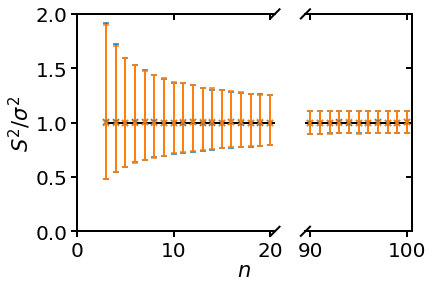

In [16]:
rcParams["axes.linewidth"] = 2
fig = plt.figure(figsize=(6, 4))
bax = brokenaxes(xlims=((0, 20.5), (89.5, 100.5)), hspace=.15)
bax.errorbar(x=n_points, y=mean_variance_sigma9_norm, 
             yerr=[std_low_variance_sigma9_norm, std_high_variance_sigma9_norm], 
             capsize=3, fmt="x", lw=2, markersize=6, markeredgewidth=1.5)
bax.errorbar(x=n_points, y=mean_variance_sigma1, 
             yerr=[std_low_variance_sigma1, std_high_variance_sigma1], 
             capsize=3, fmt="x", lw=2, markersize=6, markeredgewidth=1.5)
bax.plot(n_points, sv.expected_value_variance(n_points, sigma=1, bias=False, different_x_y=True), 
         color="k", lw=2)
bax.set_ylabel(r"$S^2/\sigma^2$", fontsize=21, labelpad=40)
bax.set_xlabel(r"$n$", fontsize=21, labelpad=25)
bax.set_ylim(0, 2)
mc.customize_figure(tick_spacing_y=0.5, tick_spacing_x=10, bax=bax)
fig.savefig(r"plt_figures\unbias_var_plot_1.svg")

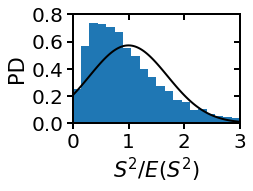

In [17]:
rcParams["axes.linewidth"] = 2
n = 3
fig, ax = plt.subplots(figsize=(3, 2))
x = np.linspace(0, 3, 100)
ratio = array_sim_variance_sigma1[n-3] / sv.expected_value_variance(n, 1, bias=False,
                                                                    different_x_y=True)
ax.set_xlabel(r"$S^2/E(S^2)$", fontsize=21)
std = np.std(ratio)
ax.hist(x=ratio, bins=20, range=(0, 3), density=True)
ax.plot(x, norm.pdf(x=x, loc=1, scale=std), color="k", lw=2)
ax.set_ylabel("PD", fontsize=21)
ax.set_xlim(0, 3)
ax.set_ylim(0, 0.8)
ax.tick_params(labelsize=20, width=2, length=6)
tick_spacing_x = 1
tick_spacing_y = 0.2
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
fig.savefig(r"plt_figures\unbias_var_plot_2_n_3.svg")

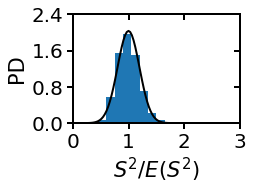

In [18]:
rcParams["axes.linewidth"] = 2
n = 27
fig, ax = plt.subplots(figsize=(3, 2))
x = np.linspace(0, 3, 100)
ratio = array_sim_variance_sigma1[n-3] / sv.expected_value_variance(n, 1, bias=False,
                                                                    different_x_y=True)
ax.set_xlabel(r"$S^2/E(S^2)$", fontsize=21)
std = np.std(ratio)
ax.hist(x=ratio, bins=20, range=(0, 3), density=True)
ax.plot(x, norm.pdf(x=x, loc=1, scale=std), color="k", lw=2)
ax.set_ylabel("PD", fontsize=21)
ax.set_xlim(0, 3)
ax.set_ylim(0, 2.4)
ax.tick_params(labelsize=20, width=2, length=6)
tick_spacing_x = 1
tick_spacing_y = 0.8
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
fig.savefig(r"plt_figures\unbias_var_plot_2_n_27.svg")

#### Biased

In [19]:
n_max_points = 100
n_simulations = 10000
seed = np.random.default_rng(100)
n_points = np.arange(3, n_max_points+1, 1)

In [20]:
sigma = 1
array_sim_variance_sigma1 = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed,
                                                            bias=True, different_x_y=True)

std_high_variance_sigma1, std_low_variance_sigma1, mean_variance_sigma1 = \
ch.sided_deviations(array_sim_variance_sigma1)

In [21]:
sigma = 9
array_sim_variance_sigma9 = sv.simulate_variance_estimation(n_max_points, n_simulations, sigma, seed,
                                                            bias=True, different_x_y=True)
std_high_variance_sigma9, std_low_variance_sigma9, mean_variance_sigma9 = \
ch.sided_deviations(array_sim_variance_sigma9)

std_high_variance_sigma9_norm = std_high_variance_sigma9 / sigma**2
std_low_variance_sigma9_norm = std_low_variance_sigma9 / sigma**2
mean_variance_sigma9_norm = mean_variance_sigma9 / sigma**2

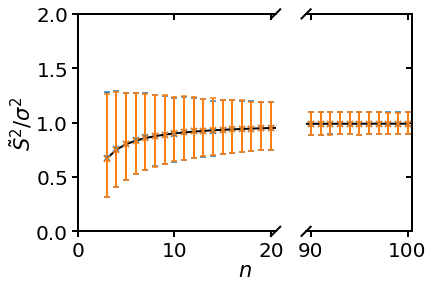

In [22]:
rcParams["axes.linewidth"] = 2
fig = plt.figure(figsize=(6, 4))
bax = brokenaxes(xlims=((0, 20.5), (89.5, 100.5)), hspace=.15)
bax.errorbar(x=n_points, y=mean_variance_sigma9_norm, 
             yerr=[std_low_variance_sigma9_norm, std_high_variance_sigma9_norm], 
             capsize=3, fmt="x", lw=2, markersize=6, markeredgewidth=1.5)
bax.errorbar(x=n_points, y=mean_variance_sigma1, 
             yerr=[std_low_variance_sigma1, std_high_variance_sigma1], 
             capsize=3, fmt="x", lw=2, markersize=6, markeredgewidth=1.5)
bax.plot(n_points, sv.expected_value_variance(n_points, sigma=1, bias=True, different_x_y=True), 
         color="k", lw=2)
bax.set_ylabel(r"$\tilde{S}^2/\sigma^2$", fontsize=21, labelpad=40)
bax.set_xlabel(r"$n$", fontsize=21, labelpad=25)
bax.set_ylim(0, 2)
mc.customize_figure(tick_spacing_y=0.5, tick_spacing_x=10, bax=bax)
fig.savefig(r"plt_figures\bias_var_plot_1.svg")

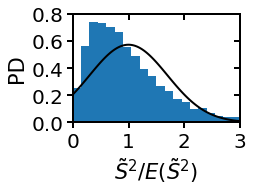

In [23]:
rcParams["axes.linewidth"] = 2
n = 3
fig, ax = plt.subplots(figsize=(3, 2))
x = np.linspace(0, 3, 100)
ratio = array_sim_variance_sigma1[n-3] / sv.expected_value_variance(n, 1, bias=True,
                                                                    different_x_y=True)
ax.set_xlabel(r"$\tilde{S}^2/E(\tilde{S}^2)$", fontsize=21)
std = np.std(ratio)
ax.hist(x=ratio, bins=20, range=(0, 3), density=True)
ax.plot(x, norm.pdf(x=x, loc=1, scale=std), color="k", lw=2)
ax.set_ylabel("PD", fontsize=21)
ax.set_xlim(0, 3)
ax.set_ylim(0, 0.8)
ax.tick_params(labelsize=20, width=2, length=6)
tick_spacing_x = 1
tick_spacing_y = 0.2
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
fig.savefig(r"plt_figures\bias_var_plot_2_n_3.svg")

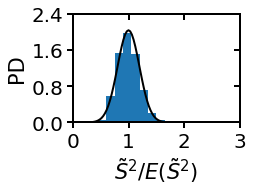

In [24]:
rcParams["axes.linewidth"] = 2
n = 27
fig, ax = plt.subplots(figsize=(3, 2))
x = np.linspace(0, 3, 100)
ratio = array_sim_variance_sigma1[n-3] / sv.expected_value_variance(n, 1, bias=True,
                                                                    different_x_y=True)
ax.set_xlabel(r"$\tilde{S}^2/E(\tilde{S}^2)$", fontsize=21)
std = np.std(ratio)
ax.hist(x=ratio, bins=20, range=(0, 3), density=True)
ax.plot(x, norm.pdf(x=x, loc=1, scale=std), color="k", lw=2)
ax.set_ylabel("PD", fontsize=21)
ax.set_xlim(0, 3)
ax.set_ylim(0, 2.4)
ax.tick_params(labelsize=20, width=2, length=6)
tick_spacing_x = 1
tick_spacing_y = 0.8
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
fig.savefig(r"plt_figures\bias_var_plot_2_n_27.svg")

## 3. The true positive rate TPR and false discovery rate FDR with selection by variance

#### Unbiased

In [25]:
lookuptable_unbias = pd.read_csv(r"lookup_tables\lookup_table_unbiased_2d.csv", index_col=0)

In [26]:
cluster_std = 8
max_unbias_1 = lookuptable_unbias.loc["$quant_{0.8}(n)$"].astype(float).values * cluster_std**2
max_unbias_2 = lookuptable_unbias.loc["$quant_{0.95}(n)$"].astype(float).values * cluster_std**2
max_unbias_3 = lookuptable_unbias.loc["$quant_{0.99}(n)$"].astype(float).values * cluster_std**2
max_unbias_4 = lookuptable_unbias.loc["$quant_{0.999}(n)$"].astype(float).values * cluster_std**2
max_unbias_5 = lookuptable_unbias.loc["$quant_{0.9999}(n)$"].astype(float).values * cluster_std**2

In [17]:
n_simulations = 30
max_variances = [max_unbias_1, max_unbias_2, max_unbias_3, max_unbias_4, max_unbias_5]
parent_intensities = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
limits_ = si.limits(parent_intensities, 15e-5, 5000)
alg_param = dict(eps=25, min_samples=3)
sim_param = dict(cluster_mu=9, cluster_std=8, min_samples=3, seed=np.random.default_rng(100))
unbias_var_means, unbias_var_stds = sv.selection_by_variance(n_simulations, parent_intensities,
                                                             limits_, sim_param, alg_param, 
                                                             max_variances, bessel_correction=True)
np.save(file=r"npy_files\unbias_var_means.npy", arr=unbias_var_means)
np.save(file=r"npy_files\unbias_var_stds.npy", arr=unbias_var_stds)

In [27]:
unbias_var_means = np.load(r"npy_files\unbias_var_means.npy")
unbias_var_stds = np.load(r"npy_files\unbias_var_stds.npy")

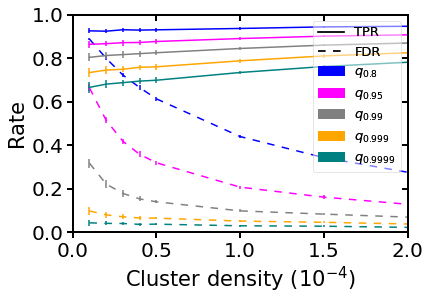

In [28]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(6, 4))
x = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
color = ["blue", "magenta", "grey", "orange", "teal"]
patches = {}
for i, threshold in enumerate(["$q_{0.8}$", "$q_{0.95}$", "$q_{0.99}$", "$q_{0.999}$",
                               "$q_{0.9999}$"]):
    fdr = unbias_var_means[:, i, 0]
    fdr_yerr = unbias_var_stds[:, i, 0]
    tpr = unbias_var_means[:, i, 1]
    tpr_yerr = unbias_var_stds[:, i, 1]
    ax.errorbar(x, fdr, yerr=fdr_yerr, ls=(0, (5, 5)), c=color[i], marker="", markeredgewidth=2)
    ax.errorbar(x, tpr, yerr=tpr_yerr, c=color[i], marker="", markeredgewidth=2)
    patches["patch{0}".format(i)] = mpatches.Patch(color=color[i], label=threshold)
handles_legend = [mlines.Line2D([], [], label="TPR", c="k", marker=""), 
                  mlines.Line2D([], [], label="FDR", linestyle=(0, (5, 5)), c="k", marker="")]
for patch in patches.values():
    handles_legend.append(patch)
second_legend = ax.legend(handles=handles_legend, loc=1, fontsize=13, framealpha=0.3)
ax.add_artist(second_legend)
ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
ax.set_xlabel("Cluster density (" + r"$10^{-4}$" + ")", fontsize=21)
ax.set_ylabel("Rate", fontsize=21)
ax.tick_params(labelsize=20, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)
tick_spacing_x = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
tick_spacing_y = 0.2
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.set_ylim(0, 1)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.set_xlim(0, 20e-5)
fig.savefig(r"plt_figures\unbias_var.svg")

#### Biased

In [29]:
lookuptable_bias = pd.read_csv(r"lookup_tables\lookup_table_biased_2d.csv", index_col=0)

In [30]:
cluster_std = 8
max_bias_1 = lookuptable_bias.loc["$quant_{0.8}(n)$"].astype(float).values * cluster_std**2
max_bias_2 = lookuptable_bias.loc["$quant_{0.95}(n)$"].astype(float).values * cluster_std**2
max_bias_3 = lookuptable_bias.loc["$quant_{0.99}(n)$"].astype(float).values * cluster_std**2
max_bias_4 = lookuptable_bias.loc["$quant_{0.999}(n)$"].astype(float).values * cluster_std**2
max_bias_5 = lookuptable_bias.loc["$quant_{0.9999}(n)$"].astype(float).values * cluster_std**2

In [16]:
n_simulations = 30
max_variances = [max_bias_1, max_bias_2, max_bias_3, max_bias_4, max_bias_5]
parent_intensities = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
limits_ = si.limits(parent_intensities, 15e-5, 5000)
alg_param = dict(eps=25, min_samples=3)
sim_param = dict(cluster_mu=9, cluster_std=8, min_samples=3, seed=np.random.default_rng(100))
bias_var_means, bias_var_stds = sv.selection_by_variance(n_simulations, parent_intensities, limits_,
                                                         sim_param, alg_param, max_variances, 
                                                         bessel_correction=False)
np.save(file=r"npy_files\bias_var_means.npy", arr=bias_var_means)
np.save(file=r"npy_files\bias_var_stds.npy", arr=bias_var_stds)

In [31]:
bias_var_means = np.load(r"npy_files\bias_var_means.npy")
bias_var_stds = np.load(r"npy_files\bias_var_stds.npy")

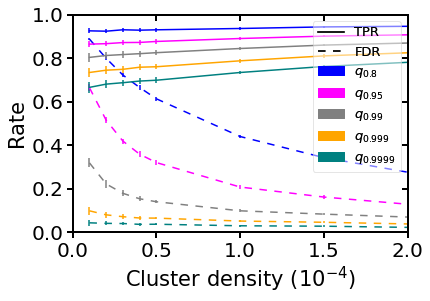

In [32]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(6, 4))
x = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
color = ["blue", "magenta", "grey", "orange", "teal"]
patches = {}
for i, threshold in enumerate(["$q_{0.8}$", "$q_{0.95}$", "$q_{0.99}$", "$q_{0.999}$",
                               "$q_{0.9999}$"]):
    fdr = bias_var_means[:, i, 0]
    fdr_yerr = bias_var_stds[:, i, 0]
    tpr = bias_var_means[:, i, 1]
    tpr_yerr = bias_var_stds[:, i, 1]
    ax.errorbar(x, fdr, yerr=fdr_yerr, ls=(0, (5, 5)), c=color[i], marker="", markeredgewidth=2)
    ax.errorbar(x, tpr, yerr=tpr_yerr, c=color[i], marker="", markeredgewidth=2)
    patches["patch{0}".format(i)] = mpatches.Patch(color=color[i], label=threshold)
handles_legend = [mlines.Line2D([], [], label="TPR", c="k", marker=""), 
                  mlines.Line2D([], [], label="FDR", linestyle=(0, (5, 5)), c="k", marker="")]
for patch in patches.values():
    handles_legend.append(patch)
second_legend = ax.legend(handles=handles_legend, loc=1, fontsize=13, framealpha=0.3)
ax.add_artist(second_legend)
ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
ax.set_xlabel("Cluster density (" + r"$10^{-4}$" + ")", fontsize=21)
ax.set_ylabel("Rate", fontsize=21)
ax.tick_params(labelsize=20, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)
tick_spacing_x = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
tick_spacing_y = 0.2
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.set_ylim(0, 1)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.set_xlim(0, 20e-5)
fig.savefig(r"plt_figures\bias_var.svg")

### Representation in pie chart

Note that using quantiles as threshold allow to predict the ratio of false positives relative to condition negatives. The values of FP displayed in the pie charts are FP relative to condition negatives as well as condition positives.

#### Unbiased

In [33]:
sca_means = pd.read_csv("csv_files\chc_merging_means.csv", index_col=[0, 1])
densities = sca_means.index.levels[0]
density = densities[5]

unbias_var_means = np.load(r"npy_files\unbias_var_means.npy")

condition_positive = merged = sca_means.loc[(density, slice(None)), 
                                            "Algorithm merged clusters"].values[0]
condition_negative = 1 - condition_positive

TPR = unbias_var_means[5, 1, 1]
TP = TPR * condition_positive
FN = condition_positive - TP
FDR = unbias_var_means[5, 1, 0]
FP = FDR * TP / (1-FDR)
TN = condition_negative - FP

print(f"FP - {FP:.2f}, TP - {TP:.2f}, FN - {FN:.2f}, TN - {TN:.2f}")

FP - 0.05, TP - 0.20, FN - 0.02, TN - 0.72


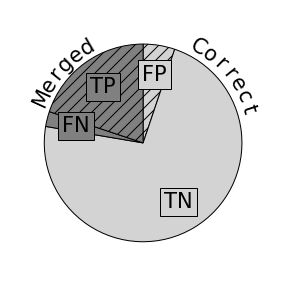

In [34]:
sizes = np.array([FP*100, TN*100, FN*100, TP*100])
labels = ["FP", "TN", "FN", "TP"]
colors = ["lightgrey", "lightgrey", "grey", "grey"]
hatches = ["//", "", "", "//"]
text_props = dict(size=21, va="center", ha="center", bbox=dict(boxstyle="square, pad=0.2"))
rounded_texts = ["Correct", None, "Merged", None]
wedgealignments = [30, None, 15, None]
startangle = 90
stretch = 0.6
rt_size = 21
rt_h_space = 7
rt_v_space = 1.02
radius = 2
labeldistance = 0.7

fig, ax = pie_plot(sizes, labels, colors, labeldistance, radius, text_props, hatches, rounded_texts, 
                   rt_size, rt_h_space, rt_v_space, wedgealignments, stretch, startangle)
fig.savefig(r"plt_figures\unbias_var_pie_plot.svg")

#### Biased

In [35]:
sca_means = pd.read_csv("csv_files\chc_merging_means.csv", index_col=[0, 1])
densities = sca_means.index.levels[0]
density = densities[5]

bias_var_means = np.load(r"npy_files\bias_var_means.npy")

condition_positive = merged = sca_means.loc[(density, slice(None)), 
                                            "Algorithm merged clusters"].values[0]
condition_negative = 1 - condition_positive

TPR = bias_var_means[5, 1, 1]
TP = TPR * condition_positive
FN = condition_positive - TP
FDR = bias_var_means[5, 1, 0]
FP = FDR * TP / (1-FDR)
TN = condition_negative - FP

print(f"FP - {FP:.2f}, TP - {TP:.2f}, FN - {FN:.2f}, TN - {TN:.2f}")

FP - 0.05, TP - 0.20, FN - 0.02, TN - 0.72


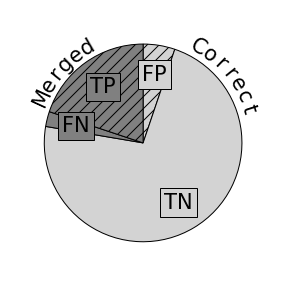

In [36]:
sizes = np.array([FP*100, TN*100, FN*100, TP*100])
labels = ["FP", "TN", "FN", "TP"]
colors = ["lightgrey", "lightgrey", "grey", "grey"]
hatches = ["//", "", "", "//"]
text_props = dict(size=21, va="center", ha="center", bbox=dict(boxstyle="square, pad=0.2"))
rounded_texts = ["Correct", None, "Merged", None]
wedgealignments = [30, None, 15, None]
startangle = 90
stretch = 0.6
rt_size = 21
rt_h_space = 7
rt_v_space = 1.02
radius = 2
labeldistance = 0.7

fig, ax = pie_plot(sizes, labels, colors, labeldistance, radius, text_props, hatches, rounded_texts, 
                   rt_size, rt_h_space, rt_v_space, wedgealignments, stretch, startangle)
fig.savefig(r"plt_figures\bias_var_pie_plot.svg")

## 4. The true positive rate TPR and false discovery rate FDR with selection by convex hull properties

#### Area

In [15]:
lookuptable_area = sv.lookuptable_convexhull(mode="area", seed=100, n_max_points=200, 
                                             n_simulations=100000, sigma=1, 
                                             quantiles=[0.8, 0.95, 0.99, 0.999, 0.9999],
                                             save_to=r"lookup_tables\lookup_table_area_2d_update.csv")

In [12]:
lookuptable_area  # the SEM is the same as stated in notebook 2

,3,4,5,6,7,8,9,10,11,12,...,191,192,193,194,195,196,197,198,199,200
$E(A(n))$,0.87,1.73,2.51,3.21,3.83,4.40,4.91,5.38,5.81,6.21,...,20.79,20.82,20.85,20.88,20.91,20.94,20.97,21.00,21.03,21.05
$Mean(A(n))$,0.86,1.73,2.52,3.22,3.84,4.39,4.90,5.39,5.81,6.21,...,20.80,20.82,20.87,20.88,20.92,20.94,20.97,21.01,21.02,21.05
$std_{pos}(n)$,1.22,1.60,1.83,1.98,2.10,2.15,2.21,2.29,2.33,2.34,...,2.60,2.61,2.62,2.60,2.61,2.62,2.59,2.61,2.61,2.61
$std_{neg}(n)$,0.56,0.91,1.14,1.32,1.44,1.54,1.61,1.68,1.73,1.77,...,2.21,2.20,2.21,2.20,2.21,2.19,2.20,2.20,2.21,2.20
$quant_{0.8}(n)$,1.38,2.60,3.59,4.44,5.16,5.80,6.38,6.93,7.39,7.81,...,22.74,22.76,22.81,22.82,22.87,22.89,22.91,22.95,22.98,22.99
$quant_{0.95}(n)$,2.59,4.13,5.34,6.31,7.14,7.80,8.39,9.01,9.53,9.94,...,25.00,25.05,25.09,25.08,25.14,25.16,25.15,25.19,25.24,25.27
$quant_{0.99}(n)$,3.96,5.81,7.18,8.25,9.12,9.74,10.43,11.08,11.60,12.06,...,27.11,27.18,27.28,27.21,27.28,27.29,27.26,27.42,27.35,27.51
$quant_{0.999}(n)$,5.98,8.02,9.52,10.64,11.57,12.46,13.12,13.99,14.24,14.61,...,29.78,29.93,30.04,29.90,30.02,30.26,29.95,30.18,30.12,30.11
$quant_{0.9999}(n)$,7.71,10.54,11.90,13.19,14.72,15.08,15.78,17.27,16.97,16.96,...,32.99,33.39,32.98,32.50,31.96,33.02,33.59,33.02,32.66,32.68


In [37]:
lookuptable_area = pd.read_csv(r"lookup_tables\lookup_table_area_2d_update.csv", index_col=0)

In [38]:
cluster_std = 8
max_area_1 = lookuptable_area.loc["$quant_{0.8}(n)$"].astype(float).values * cluster_std**2
max_area_2 = lookuptable_area.loc["$quant_{0.95}(n)$"].astype(float).values * cluster_std**2
max_area_3 = lookuptable_area.loc["$quant_{0.99}(n)$"].astype(float).values * cluster_std**2
max_area_4 = lookuptable_area.loc["$quant_{0.999}(n)$"].astype(float).values * cluster_std**2
max_area_5 = lookuptable_area.loc["$quant_{0.9999}(n)$"].astype(float).values * cluster_std**2

In [27]:
parent_intensities = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
limits_ = si.limits(parent_intensities, 15e-5, 5000)
sim_param = dict(cluster_mu=9, cluster_std=8, min_samples=3, seed=np.random.default_rng(100))
alg_param = dict(eps=25, min_samples=3)
n_simulations = 30
max_areas = [max_area_1, max_area_2, max_area_3, max_area_4, max_area_5]
ch_area_means, ch_area_stds = sv.selection_by_ch_area(n_simulations, parent_intensities, 
                                                      limits_, sim_param, alg_param, max_areas)
np.save(file=r"npy_files\ch_area_means.npy", arr=ch_area_means)
np.save(file=r"npy_files\ch_area_stds.npy", arr=ch_area_stds)

In [39]:
ch_area_means = np.load(r"npy_files\ch_area_means.npy")
ch_area_stds = np.load(r"npy_files\ch_area_stds.npy")

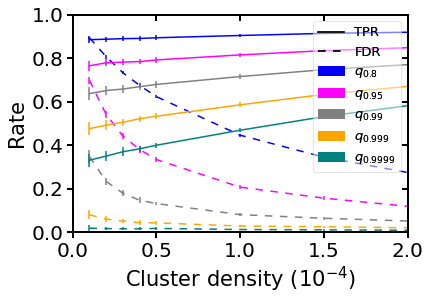

In [40]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(6, 4))
x = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
color = ["blue", "magenta", "grey", "orange", "teal"]
patches = {}
for i, threshold in enumerate(["$q_{0.8}$", "$q_{0.95}$", "$q_{0.99}$", "$q_{0.999}$",
                               "$q_{0.9999}$"]):
    fdr = ch_area_means[:, i, 0]
    fdr_yerr = ch_area_stds[:, i, 0]
    tpr = ch_area_means[:, i, 1]
    tpr_yerr = ch_area_stds[:, i, 1]
    ax.errorbar(x, fdr, yerr=fdr_yerr, ls=(0, (5, 5)), c=color[i], marker="", markeredgewidth=2)
    ax.errorbar(x, tpr, yerr=tpr_yerr, c=color[i], marker="", markeredgewidth=2)
    patches["patch{0}".format(i)] = mpatches.Patch(color=color[i], label=threshold)
handles_legend = [mlines.Line2D([], [], label="TPR", c="k", marker=""), 
                  mlines.Line2D([], [], label="FDR", linestyle=(0, (5, 5)), c="k", marker="")]
for patch in patches.values():
    handles_legend.append(patch)
second_legend = ax.legend(handles=handles_legend, loc=1, fontsize=13, framealpha=0.3)
ax.add_artist(second_legend)
ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
ax.set_xlabel("Cluster density (" + r"$10^{-4}$" + ")", fontsize=21)
ax.set_ylabel("Rate", fontsize=21)
ax.tick_params(labelsize=20, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)
tick_spacing_x = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
tick_spacing_y = 0.2
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.set_ylim(0, 1)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.set_xlim(0, 20e-5)
fig.savefig(r"plt_figures\ch_area.svg")

#### Perimeter

In [18]:
lookuptable_peri = sv.lookuptable_convexhull(mode="peri", seed=100, n_max_points=200, 
                                             n_simulations=100000, sigma=1, 
                                             quantiles=[0.8, 0.95, 0.99, 0.999, 0.9999],
                                             save_to=r"lookup_tables\lookup_table_peri_2d_update.csv")

In [14]:
lookuptable_peri  # the SEM is the same as stated in notebook 2

,3,4,5,6,7,8,9,10,11,12,...,191,192,193,194,195,196,197,198,199,200
$E(P(n))$,5.32,6.47,7.31,7.96,8.50,8.94,9.33,9.67,9.97,10.24,...,17.16,17.17,17.18,17.19,17.20,17.21,17.22,17.23,17.24,17.25
$Mean(P(n))$,5.31,6.48,7.31,7.97,8.50,8.94,9.33,9.67,9.97,10.23,...,17.16,17.17,17.18,17.19,17.21,17.21,17.22,17.24,17.24,17.25
$std_{pos}(n)$,2.11,2.06,2.01,1.95,1.91,1.85,1.82,1.81,1.78,1.74,...,1.16,1.17,1.16,1.16,1.16,1.16,1.16,1.16,1.16,1.16
$std_{neg}(n)$,1.77,1.79,1.77,1.76,1.72,1.69,1.65,1.63,1.60,1.58,...,1.03,1.03,1.03,1.02,1.02,1.02,1.02,1.02,1.02,1.02
$quant_{0.8}(n)$,6.93,8.07,8.87,9.51,10.00,10.42,10.76,11.09,11.37,11.61,...,18.06,18.06,18.08,18.08,18.10,18.11,18.11,18.13,18.14,18.14
$quant_{0.95}(n)$,8.73,9.84,10.58,11.17,11.63,11.96,12.29,12.61,12.88,13.08,...,19.04,19.06,19.09,19.08,19.10,19.10,19.10,19.12,19.13,19.14
$quant_{0.99}(n)$,10.31,11.40,12.14,12.62,13.08,13.36,13.67,13.97,14.23,14.38,...,19.97,19.99,19.98,20.00,20.00,20.03,20.00,20.05,20.04,20.08
$quant_{0.999}(n)$,12.23,13.14,13.81,14.22,14.69,14.95,15.26,15.76,15.75,15.83,...,21.08,21.13,21.11,21.07,21.16,21.14,21.10,21.19,21.21,21.24
$quant_{0.9999}(n)$,13.49,14.74,15.35,15.49,16.16,16.41,16.77,17.28,17.18,16.97,...,22.19,22.22,22.28,22.25,22.28,22.30,22.27,22.35,22.04,22.22


In [41]:
lookuptable_peri = pd.read_csv(r"lookup_tables\lookup_table_peri_2d_update.csv", index_col=0)

In [42]:
cluster_std = 8
max_peri_1 = lookuptable_peri.loc["$quant_{0.8}(n)$"].astype(float).values * cluster_std
max_peri_2 = lookuptable_peri.loc["$quant_{0.95}(n)$"].astype(float).values * cluster_std
max_peri_3 = lookuptable_peri.loc["$quant_{0.99}(n)$"].astype(float).values * cluster_std
max_peri_4 = lookuptable_peri.loc["$quant_{0.999}(n)$"].astype(float).values * cluster_std
max_peri_5 = lookuptable_peri.loc["$quant_{0.9999}(n)$"].astype(float).values * cluster_std

In [5]:
parent_intensities = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
limits_ = si.limits(parent_intensities, 15e-5, 5000)
sim_param = dict(cluster_mu=9, cluster_std=8, min_samples=3, seed=np.random.default_rng(100))
alg_param = dict(eps=25, min_samples=3)
n_simulations = 30
max_peris = [max_peri_1, max_peri_2, max_peri_3, max_peri_4, max_peri_5]
ch_peri_means, ch_peri_stds = sv.selection_by_ch_peri(n_simulations, parent_intensities, 
                                                      limits_, sim_param, alg_param, max_peris)
np.save(file=r"npy_files\ch_peri_means.npy", arr=ch_peri_means)
np.save(file=r"npy_files\ch_peri_stds.npy", arr=ch_peri_stds)

In [43]:
ch_peri_means = np.load(r"npy_files\ch_peri_means.npy")
ch_peri_stds = np.load(r"npy_files\ch_peri_stds.npy")

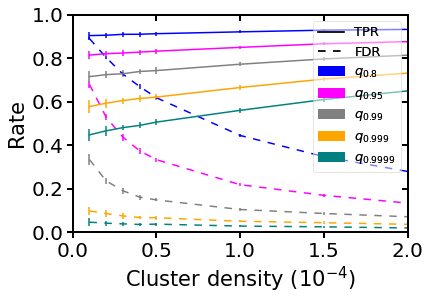

In [44]:
rcParams["axes.linewidth"] = 2
fig, ax = plt.subplots(figsize=(6, 4))
x = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 10e-5, 15e-5, 20e-5]
color = ["blue", "magenta", "grey", "orange", "teal"]
patches = {}
for i, threshold in enumerate(["$q_{0.8}$", "$q_{0.95}$", "$q_{0.99}$", "$q_{0.999}$",
                               "$q_{0.9999}$"]):
    fdr = ch_peri_means[:, i, 0]
    fdr_yerr = ch_peri_stds[:, i, 0]
    tpr = ch_peri_means[:, i, 1]
    tpr_yerr = ch_peri_stds[:, i, 1]
    ax.errorbar(x, fdr, yerr=fdr_yerr, ls=(0, (5, 5)), c=color[i], marker="", markeredgewidth=2)
    ax.errorbar(x, tpr, yerr=tpr_yerr, c=color[i], marker="", markeredgewidth=2)
    patches["patch{0}".format(i)] = mpatches.Patch(color=color[i], label=threshold)
handles_legend = [mlines.Line2D([], [], label="TPR", c="k", marker=""), 
                  mlines.Line2D([], [], label="FDR", linestyle=(0, (5, 5)), c="k", marker="")]
for patch in patches.values():
    handles_legend.append(patch)
second_legend = ax.legend(handles=handles_legend, loc=1, fontsize=13, framealpha=0.3)
ax.add_artist(second_legend)
ax.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
ax.set_xlabel("Cluster density (" + r"$10^{-4}$" + ")", fontsize=21)
ax.set_ylabel("Rate", fontsize=21)
ax.tick_params(labelsize=20, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)
tick_spacing_x = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
tick_spacing_y = 0.2
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.set_ylim(0, 1)
second_axis(ax, "top", tick_spacing_x)
second_axis(ax, "right", tick_spacing_y)
ax.set_xlim(0, 20e-5)
fig.savefig(r"plt_figures\ch_peri.svg")

### Representation in pie chart

#### Area

In [45]:
sca_means = pd.read_csv("csv_files\chc_merging_means.csv", index_col=[0, 1])
densities = sca_means.index.levels[0]
density = densities[5]

ch_area_means = np.load(r"npy_files\ch_area_means.npy")

condition_positive = merged = sca_means.loc[(density, slice(None)), 
                                            "Algorithm merged clusters"].values[0]
condition_negative = 1 - condition_positive

TPR = ch_area_means[5, 1, 1]
TP = TPR * condition_positive
FN = condition_positive - TP
FDR = ch_area_means[5, 1, 0]
FP = FDR * TP / (1-FDR)
TN = condition_negative - FP

print(f"FP - {FP:.2f}, TP - {TP:.2f}, FN - {FN:.2f}, TN - {TN:.2f}")

FP - 0.05, TP - 0.18, FN - 0.04, TN - 0.73


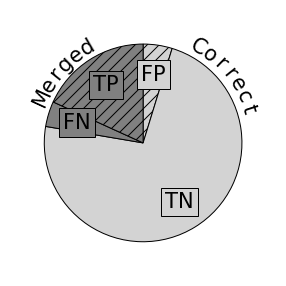

In [46]:
sizes = np.array([FP*100, TN*100, FN*100, TP*100])
labels = ["FP", "TN", "FN", "TP"]
colors = ["lightgrey", "lightgrey", "grey", "grey"]
hatches = ["//", "", "", "//"]
text_props = dict(size=21, va="center", ha="center", bbox=dict(boxstyle="square, pad=0.2"))
rounded_texts = ["Correct", None, "Merged", None]
wedgealignments = [30, None, 15, None]
startangle = 90
stretch = 0.6
rt_size = 21
rt_h_space = 7
rt_v_space = 1.02
radius = 2
labeldistance = 0.7

fig, ax = pie_plot(sizes, labels, colors, labeldistance, radius, text_props, hatches, rounded_texts,
                   rt_size, rt_h_space, rt_v_space, wedgealignments, stretch, startangle)
fig.savefig(r"plt_figures\ch_area_pie_plot.svg")

#### Perimeter

In [47]:
sca_means = pd.read_csv("csv_files\chc_merging_means.csv", index_col=[0, 1])
densities = sca_means.index.levels[0]
density = densities[5]

ch_peri_means = np.load(r"npy_files\ch_peri_means.npy")

condition_positive = merged = sca_means.loc[(density, slice(None)), 
                                            "Algorithm merged clusters"].values[0]
condition_negative = 1 - condition_positive

TPR = ch_peri_means[5, 1, 1]
TP = TPR * condition_positive
FN = condition_positive - TP
FDR = ch_peri_means[5, 1, 0]
FP = FDR * TP / (1-FDR)
TN = condition_negative - FP

print(f"FP - {FP:.2f}, TP - {TP:.2f}, FN - {FN:.2f}, TN - {TN:.2f}")

FP - 0.05, TP - 0.19, FN - 0.03, TN - 0.72


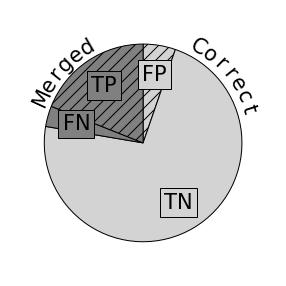

In [48]:
sizes = np.array([FP*100, TN*100, FN*100, TP*100])
labels = ["FP", "TN", "FN", "TP"]
colors = ["lightgrey", "lightgrey", "grey", "grey"]
hatches = ["//", "", "", "//"]
text_props = dict(size=21, va="center", ha="center", bbox=dict(boxstyle="square, pad=0.2"))
rounded_texts = ["Correct", None, "Merged", None]
wedgealignments = [30, None, 15, None]
startangle = 90
stretch = 0.6
rt_size = 21
rt_h_space = 7
rt_v_space = 1.02
radius = 2
labeldistance = 0.7

fig, ax = pie_plot(sizes, labels, colors, labeldistance, radius, text_props, hatches, rounded_texts,
                   rt_size, rt_h_space, rt_v_space, wedgealignments, stretch, startangle)
fig.savefig(r"plt_figures\ch_peri_pie_plot.svg")